In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn

In [2]:
df = pd.read_csv('../data/creditcard.csv')
df.drop(columns=['Time'],axis=0,inplace=True)
df.head(2)
df_pos=df[df.Class==1].reset_index()
df.drop(df[df.Class==1].index, inplace=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.head(20000)
df = pd.concat([df,df_pos],axis=0)
df = df.sample(frac=1).reset_index(drop=True)
df.drop(columns=['index'],axis=0,inplace=True)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [3]:
# df.Class.head()

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from models.adaboost import AdaBoost
from models.decisiontree import DecisionTree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sn

K=15
D=1

X, y = df.drop(columns=['Class']).to_numpy(), df['Class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)



dtc    :  0.9912173700902659


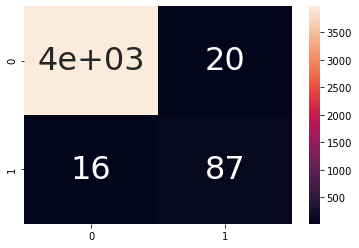

In [5]:
dtc_ = DecisionTreeClassifier()
dtc_.fit(X_train, y_train)

sn.heatmap(confusion_matrix(y_test, dtc_.predict(X_test)), annot=True, annot_kws={"size": 32})
print('dtc    : ', dtc_.score(X_test, y_test))


Trained
dtc_me   :  0.991461332032203


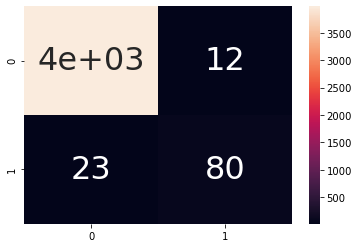

In [59]:
dtc = DecisionTree(max_depth=20)
dtc.fit(X_train, y_train)
print('Trained')
sn.heatmap(confusion_matrix(y_test, dtc.predict(X_test)), annot=True, annot_kws={"size": 32})
print('dtc_me   : ', dtc.score(X_test, y_test))
# dtc.print_tree()

scikit :  0.9946328372773847


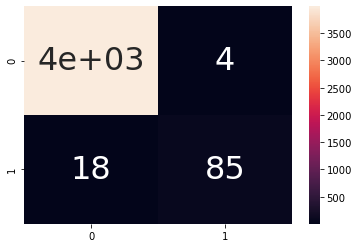

In [7]:
model_ = AdaBoostClassifier(n_estimators=K, base_estimator=DecisionTreeClassifier(max_depth=D))
model_.fit(X_train,y_train)

sn.heatmap(confusion_matrix(y_test, model_.predict(X_test)), annot=True, annot_kws={"size": 32})
print('scikit : ', model_.score(X_test,y_test))



fitting 15 models
scratch:  0.9931690656257623


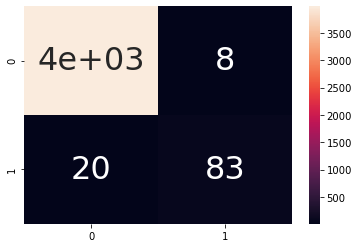

In [8]:
model = AdaBoost(n_estimators=K, base_estimator=DecisionTreeClassifier(max_depth=D))
model.fit(X_train,y_train)

sn.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, annot_kws={"size": 32})
print('scratch: ', model.score(X_test,y_test))



